In [1]:
import numpy as np
import matplotlib.pyplot as plt

MCMC can be applied equally well to discrete distributions. As an example, let's take a distribution over bitstrings

In [2]:
# auxiliary function to generate all binary strings of a given length
def generate_binary_strings(bit_count):
    binary_strings = []
    def genbin(n, bs=''):
        if len(bs) == n:
            binary_strings.append(bs)
        else:
            genbin(n, bs + '0')
            genbin(n, bs + '1')

    genbin(bit_count)
    return binary_strings

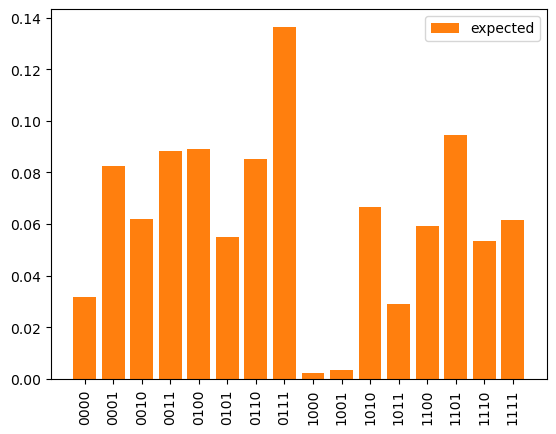

In [3]:
# Generate a random distribution over bitstrings

N = 4
bitstrings = generate_binary_strings(N)
distribution = np.random.rand(2**N)
distribution /= np.sum(distribution)

plt.bar(np.arange(2**N), distribution, tick_label=bitstrings, label='expected', color='tab:orange')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [4]:
# auxiliary function to flip k-th bit
def flip(bitstring, k):
    if bitstring[k] == '1':
        return bitstring[:k] + '0' + bitstring[k+1:]
    else:
        return bitstring[:k] + '1' + bitstring[k+1:]


# In the discrete case, the move will be to flip a random bit
def mcmc_discrete(n_therm, n_samp, n_skip, target):
    # initialize b
    b = '0'*N

    # function to perform a single bitflip move on the bit k
    def move(k):
        # propose a move b -> b_prime
        b_prime = flip(b, k)

        # calculate acceptance prob
        # keep in mind that the index in the array or probabilities
        # corresponding to bitstring `b` is given by the decimal
        # representation of `b`, which is `int(b, 2)`
        idx_b = int(b, 2)
        idx_b_prime = int(b_prime, 2)
        p = target[idx_b_prime]/target[idx_b]

        # return 1 for accepted, 0 for rejected
        r = np.random.rand()
        return p>r


    # thermalization, all these iteration are going to be
    # thrown away because the chain is not properly thermalized
    for i in range(n_therm):
        k = np.random.randint(0, N)
        if move(k):
            b = flip(b, k)
        
    # do the actual sampling. the procedure is identical to
    # thermalization, but now we will save a total of `n_samp`
    # samples every `n_skip` itrations
    acc_rate = 0
    samples = []
    for i in range(n_samp):
        for j in range(n_skip):
            k = np.random.randint(0, N)
            if move(k):
                b = flip(b, k)
                acc_rate += 1
        # every `n_skip` iterations, save a sample
        samples.append(b)
    return (samples, acc_rate/(n_samp*n_skip)) 

In [9]:
therm = 100000
nsamp = 10000
nskip = N
samples, acc_rate = mcmc_discrete(therm, nsamp, nskip, distribution)
print(acc_rate)

# build a bistribution from the samples
mc_distribution = []
for b in bitstrings:
    mc_distribution.append(samples.count(b)/nsamp)

0.7014


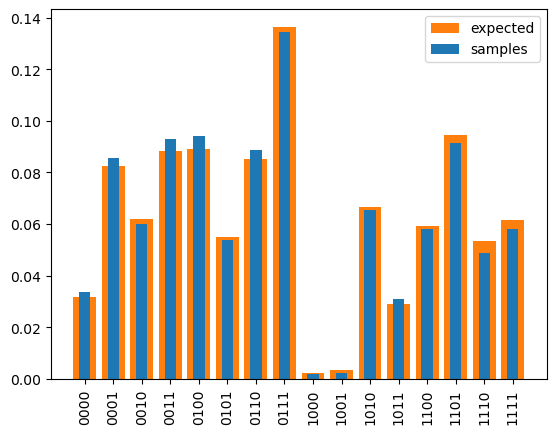

In [10]:
plt.bar(np.arange(2**N), distribution, tick_label=bitstrings, label='expected', color='tab:orange')
plt.bar(np.arange(2**N), mc_distribution, tick_label=bitstrings, width=.4, label='samples', color='tab:blue')
plt.xticks(rotation=90)
plt.legend()
plt.show()